EDA on \data\raw\beer_reviews.csv

Insight
1) 9 features can be dropped from the data dict, as they are not the expected API parameters
2) No missing records
3) there are 5741 different brewery_names (categorical features)
4) there are 104 different beer_styles (target)

Question
1) Do we split the data into train, test, val first or scale & OneHotCode the whole dataset first?
2) Do we need to split the dataset so all the different beer_styles are there?
3) What performance metric are we using?

In [4]:
# in order to import functions in src folder
# path = r"C:\Users\TinaM\Desktop\TMB_File\UTS_JUN_2023\AdvDSL_36114\AT2\ADSI_AT2"
# df_raw = pd.read_csv(path + r"\data\raw\beer_reviews.csv")

# import sys
# sys.path.append('C:\\Users\\TinaM\\Desktop\\TMB_File\\UTS_JUN_2023\\AdvDSL_36114\\AT2\\ADSI_AT2')
# print(sys.path)

['c:\\Users\\TinaM\\Desktop\\TMB_File\\UTS_JUN_2023\\AdvDSL_36114\\AT2\\ADSI_AT2\\notebooks', 'C:\\Users\\TinaM\\AppData\\Local\\Programs\\Python\\Python38\\python38.zip', 'C:\\Users\\TinaM\\AppData\\Local\\Programs\\Python\\Python38\\DLLs', 'C:\\Users\\TinaM\\AppData\\Local\\Programs\\Python\\Python38\\lib', 'C:\\Users\\TinaM\\AppData\\Local\\Programs\\Python\\Python38', 'c:\\Users\\TinaM\\.virtualenvs\\ADSI_AT2-VD9S5n3N', '', 'c:\\Users\\TinaM\\.virtualenvs\\ADSI_AT2-VD9S5n3N\\lib\\site-packages', 'c:\\Users\\TinaM\\.virtualenvs\\ADSI_AT2-VD9S5n3N\\lib\\site-packages\\win32', 'c:\\Users\\TinaM\\.virtualenvs\\ADSI_AT2-VD9S5n3N\\lib\\site-packages\\win32\\lib', 'c:\\Users\\TinaM\\.virtualenvs\\ADSI_AT2-VD9S5n3N\\lib\\site-packages\\Pythonwin', 'C:\\Users\\TinaM\\Desktop\\TMB_File\\UTS_JUN_2023\\AdvDSL_36114\\AT2\\ADSI_AT2', 'C:\\Users\\TinaM\\Desktop\\TMB_File\\UTS_JUN_2023\\AdvDSL_36114\\AT2\\ADSI_AT2']


In [5]:
import pandas as pd
import numpy as np
import os

In [6]:
df_raw = pd.read_csv("../data/raw/beer_reviews.csv")

In [7]:
df_raw.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [8]:
df_raw.shape

(1586614, 13)

In [9]:
df_raw.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [10]:
brewery_name_counts = df_raw['brewery_name'].value_counts().reset_index()

brewery_name_counts
# there are 5741 different brewery_names

,brewery_name,count
0,Boston Beer Company (Samuel Adams),39444
1,Dogfish Head Brewery,33839
2,Stone Brewing Co.,33066
3,Sierra Nevada Brewing Co.,28751
4,"Bell's Brewery, Inc.",25191
...,...,...
5737,Brauerei Stolz GmbH & Co. KG,1
5738,Hausbrauerei Düll,1
5739,Browar Grybów,1
5740,Staro&#269;eský Pivovárek Dobruka,1


In [17]:
brewery_names = brewery_name_counts['brewery_name'].to_numpy()
np.save('../data/processed/brewery_name', brewery_names)
#brewery_names = np.load('../data/processed/brewery_name.npy',allow_pickle=True)

In [11]:
from ds.visualization.visualize import plot_column_dist

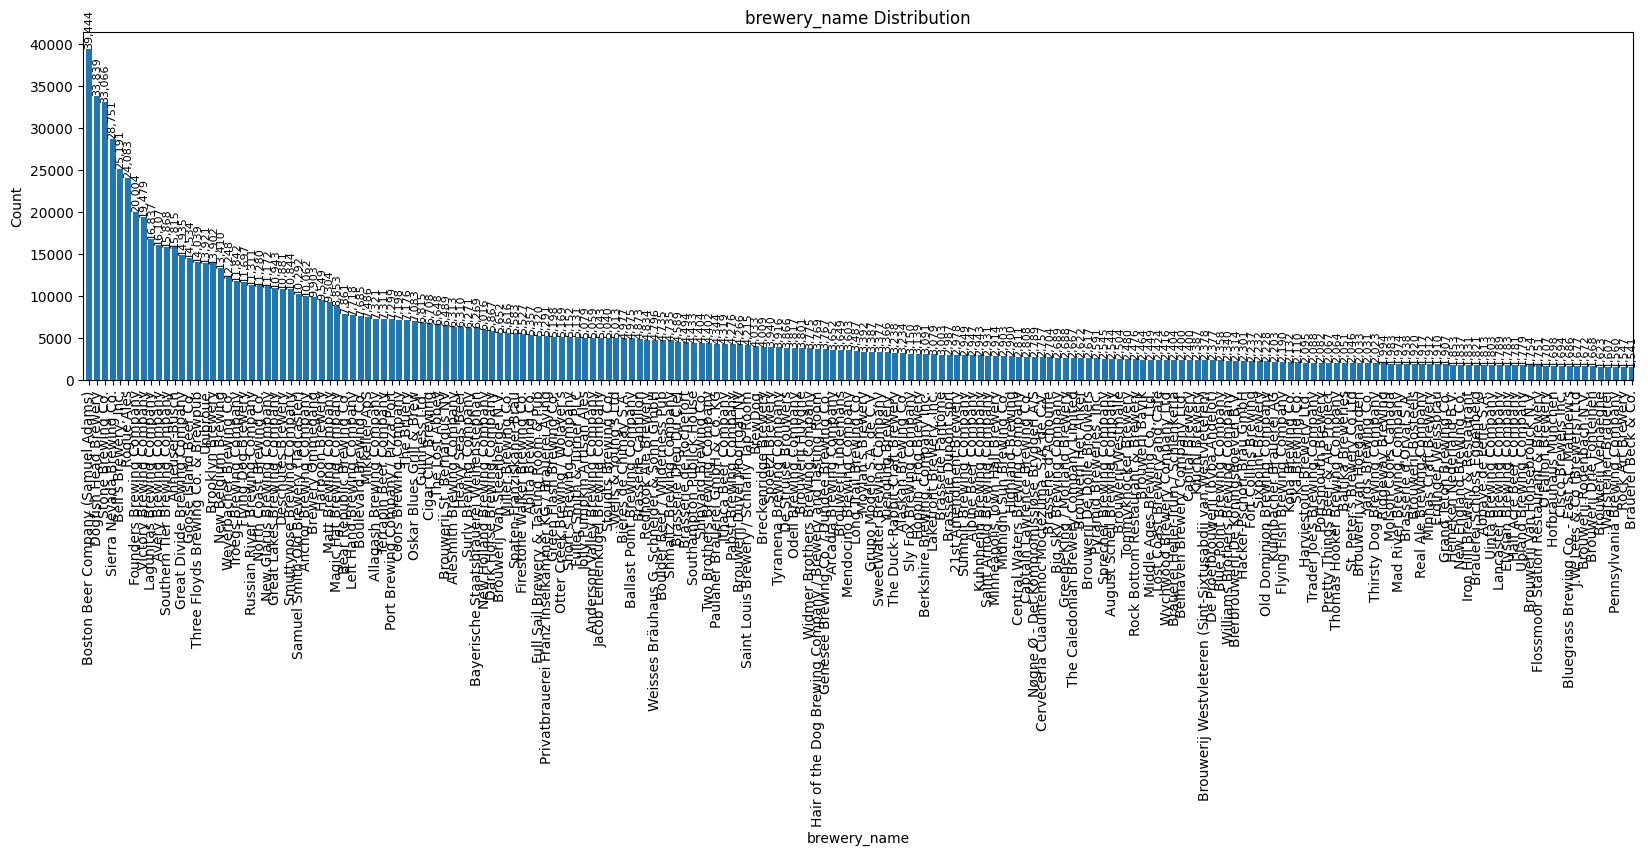

In [12]:
plot_column_dist(df_raw, 'brewery_name',top_n=200)

In [23]:
# target classes
beer_style_counts = df_raw['beer_style'].value_counts().reset_index()

beer_style_counts
# there are 104 beer_styles

,beer_style,count
0,American IPA,117586
1,American Double / Imperial IPA,85977
2,American Pale Ale (APA),63469
3,Russian Imperial Stout,54129
4,American Double / Imperial Stout,50705
...,...,...
99,Gose,686
100,Faro,609
101,Roggenbier,466
102,Kvass,297


In [24]:
brewery_style = beer_style_counts['beer_style'].to_numpy()
np.save('../data/processed/beer_style', brewery_style)
#brewery_style = np.load('../data/processed/brewery_style.npy',allow_pickle=True)

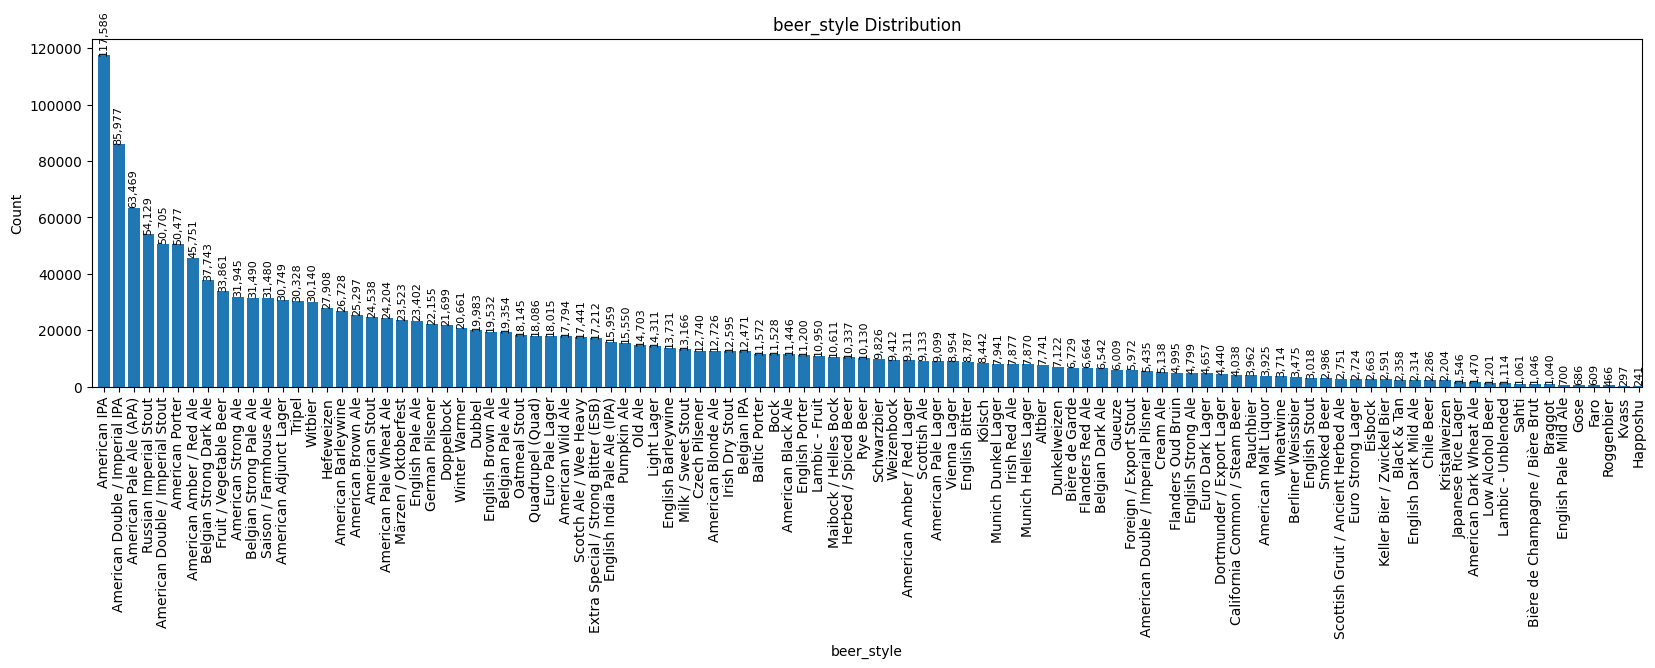

In [14]:
plot_column_dist(df_raw, 'beer_style')